- This notebook is to analysis microscopy images for the second round experiments

In [6]:
os.chdir('/Users/haoliu/Documents/GitHub/MicroscopyAnalysis')

In [7]:
pwd

'/Users/haoliu/Documents/GitHub/MicroscopyAnalysis'

In [8]:
from utils import *
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from batch_run import run_batch_files_templates

In [9]:
template1 = np.load('Templates/template_656, 640, 71, 71.npy')
template2 = np.load('Templates/Project_Whole Plate1_1024x1024_200Hz_1%Laser_800gain_B_5_R1.tif_enhance_482_20_56_56.npy')

templates = [template1, template2]

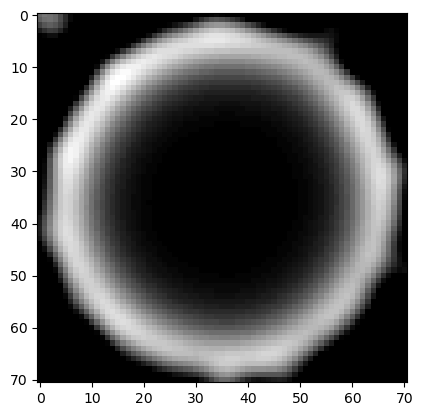

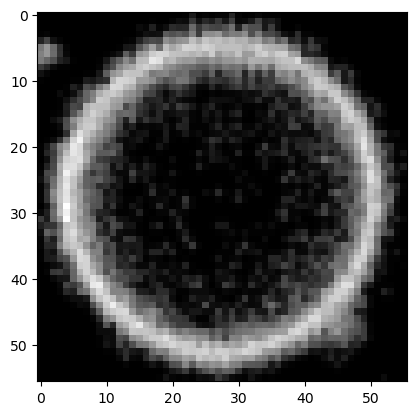

In [10]:
for template in templates:
    plt.imshow(template, cmap='gray')
    plt.show()

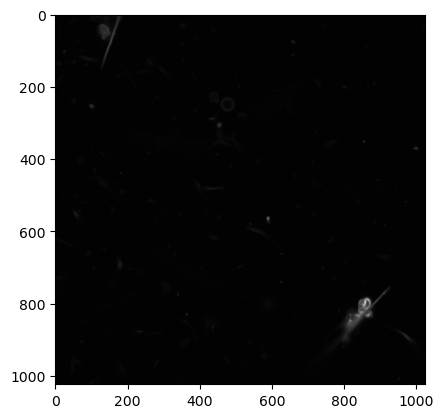

In [11]:
tiff_path = '/Users/haoliu/Documents/Hao/Fordham/Microscopy/Data/20250829_PFAS/WellC03_PointC03_0000_ChannelNile Red_Seq0000.ome.tiff'
img = cv2.imread(tiff_path, cv2.IMREAD_UNCHANGED)
plt.imshow(img, cmap='gray')

In [12]:
file_folder='/Users/haoliu/Documents/Hao/Fordham/Microscopy/Data/20250829_PFAS'

In [13]:
PlateName='Plate_20250902'
# Create the folder if it doesn't exist
folder_path = f"Results_{PlateName}"
os.makedirs(folder_path, exist_ok=True)
# Record the start time
import time
start_time = time.time()
# file_template = load_template(template)
run_batch_files_templates(file_folder, templates, PlateName, \
                min_scale=0.3, max_scale=4, intervals=100, threshold = 0.5, Preprocess=False)

# Record the end time
end_time = time.time()

# Calculate the running time
running_time = end_time - start_time

print("Script execution time:", running_time, "seconds")

13 vesicles found
WellH04_PointH04_0003_ChannelNile Red_Seq0475.ome.tiff
37 vesicles found
WellF10_PointF10_0003_ChannelNile Red_Seq0291.ome.tiff
None vesicles found
WellD15_PointD15_0003_ChannelNile Red_Seq0111.ome.tiff
4 vesicles found
WellE17_PointE17_0002_ChannelNile Red_Seq0218.ome.tiff
1 vesicles found
WellH09_PointH09_0000_ChannelNile Red_Seq0452.ome.tiff
None vesicles found
WellE14_PointE14_0002_ChannelNile Red_Seq0206.ome.tiff
None vesicles found
WellC08_PointC08_0001_ChannelNile Red_Seq0021.ome.tiff
61 vesicles found
WellC21_PointC21_0003_ChannelNile Red_Seq0075.ome.tiff
None vesicles found
WellD13_PointD13_0001_ChannelNile Red_Seq0117.ome.tiff
58 vesicles found
WellC21_PointC21_0000_ChannelNile Red_Seq0072.ome.tiff
2 vesicles found
WellH09_PointH09_0003_ChannelNile Red_Seq0455.ome.tiff
None vesicles found
WellC03_PointC03_0000_ChannelNile Red_Seq0000.ome.tiff
None vesicles found
WellG17_PointG17_0001_ChannelNile Red_Seq0377.ome.tiff
6 vesicles found
WellE19_PointE19_0002_Cha

In [14]:
df = pd.read_csv('Results_Plate_20250902/Plate_20250902_VesiclesSummary.csv')
df

,filename,num_vesicles,area_vesicles,area_percent
0,WellH04_PointH04_0003_ChannelNile Red_Seq0475....,13,4127.267349,0.003936
1,WellF10_PointF10_0003_ChannelNile Red_Seq0291....,37,60540.846629,0.057736
2,WellD15_PointD15_0003_ChannelNile Red_Seq0111....,0,0.000000,0.000000
3,WellE17_PointE17_0002_ChannelNile Red_Seq0218....,4,11755.054312,0.011210
4,WellH09_PointH09_0000_ChannelNile Red_Seq0452....,1,346.360590,0.000330
...,...,...,...,...
475,WellC07_PointC07_0000_ChannelNile Red_Seq0016....,1,1963.495408,0.001873
476,WellD05_PointD05_0000_ChannelNile Red_Seq0148....,71,122371.317043,0.116702
477,WellG13_PointG13_0001_ChannelNile Red_Seq0361....,2,692.721180,0.000661
478,WellE09_PointE09_0003_ChannelNile Red_Seq0187....,0,0.000000,0.000000


In [16]:
df_sorted = df.sort_values(by='filename')

# Extract the part before the first '_' in 'filename'
df_sorted['group'] = df_sorted['filename'].str.split('_').str[0]

# Group by 'group', take median of other columns, and keep the first row
df_final = df_sorted.groupby('group').agg({
    'filename': 'first',
    'num_vesicles': 'median',
    'area_vesicles': 'median',
    'area_percent': 'median'
}).reset_index(drop=True)

# Round num_vesicles to integer
df_final['num_vesicles'] = df_final['num_vesicles'].round().astype(int)
# By default, round() uses "round half to even" (also known as "bankers' rounding") 
# Extracting positions from filename column
df_final['position'] = df_final['filename'].str.extract(r'Well([A-Z]+\d+)_')

# Dropping the original filename column
df_final = df_final[['position', 'num_vesicles', 'area_vesicles', 'area_percent']]
df_final

,position,num_vesicles,area_vesicles,area_percent
0,C03,0,330.259928,0.000315
1,C04,10,6121.393286,0.005838
2,C05,0,330.259928,0.000315
3,C06,1,1557.051859,0.001485
4,C07,2,2107.223272,0.002010
...,...,...,...,...
115,H18,14,5449.485157,0.005197
116,H19,2,1136.863842,0.001084
117,H20,3,997.848367,0.000952
118,H21,4,2416.670149,0.002305


In [17]:
df_final['position'].values

array(['C03', 'C04', 'C05', 'C06', 'C07', 'C08', 'C09', 'C10', 'C11',
       'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20',
       'C21', 'C22', 'D03', 'D04', 'D05', 'D06', 'D07', 'D08', 'D09',
       'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'D16', 'D17', 'D18',
       'D19', 'D20', 'D21', 'D22', 'E03', 'E04', 'E05', 'E06', 'E07',
       'E08', 'E09', 'E10', 'E11', 'E12', 'E13', 'E14', 'E15', 'E16',
       'E17', 'E18', 'E19', 'E20', 'E21', 'E22', 'F03', 'F04', 'F05',
       'F06', 'F07', 'F08', 'F09', 'F10', 'F11', 'F12', 'F13', 'F14',
       'F15', 'F16', 'F17', 'F18', 'F19', 'F20', 'F21', 'F22', 'G03',
       'G04', 'G05', 'G06', 'G07', 'G08', 'G09', 'G10', 'G11', 'G12',
       'G13', 'G14', 'G15', 'G16', 'G17', 'G18', 'G19', 'G20', 'G21',
       'G22', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10',
       'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19',
       'H20', 'H21', 'H22'], dtype=object)

In [18]:
import pandas as pd

# Copy original dataframe
df_labeled = df_final.copy()

# Step 1: Define the 47 labels in order
labels = [
    # First 7 special labels
    "sample240_compare_gp_fm",
    "sample144_concentration_ori",
    "sample288_concentration_ori",
    "sample144_concentration_smi_fm",
    "sample288_concentration_smi_fm",
    "sample144_concentration_dissmi_fm",
    "sample288_concentration_dissmi_fm",
]

# Next 30 labels: 10x3 groups
labels += ["original_concentrations_highprob_replace_smi5"] * 10
labels += ["replace_dissmi3_fm_finetune_concentrations"] * 10
labels += ["replace_smi5_fm_finetune_concentrations"] * 10
labels += ["replace_smi5_fm_pre_concentrations"] * 10

# Check length
assert len(labels) == 47, f"Expected 47 labels, got {len(labels)}"

# --- Step 2: Extract the 47 + 47 duplicate wells ---
# Sorted positions (your provided list)
positions = df_final['position'].tolist()

# First 47 wells (C03–E09, skipping E10)
wells_first = positions[:47]

# Next 47 wells (E11–G17)
wells_second = positions[48:95]

# --- Step 3: Build mapping for labels ---
mapping = dict(zip(wells_first, labels))
mapping.update(dict(zip(wells_second, labels)))  # duplicates

# --- Step 4: Filter and assign categories ---
df_selected = df_labeled[df_labeled['position'].isin(wells_first + wells_second)].copy()
df_selected['category'] = df_selected['position'].map(mapping)

df_selected.reset_index(drop=True, inplace=True)


In [19]:
df_selected

,position,num_vesicles,area_vesicles,area_percent,category
0,C03,0,330.259928,0.000315,sample240_compare_gp_fm
1,C04,10,6121.393286,0.005838,sample144_concentration_ori
2,C05,0,330.259928,0.000315,sample288_concentration_ori
3,C06,1,1557.051859,0.001485,sample144_concentration_smi_fm
4,C07,2,2107.223272,0.002010,sample288_concentration_smi_fm
...,...,...,...,...,...
89,G13,2,573.340659,0.000547,replace_smi5_fm_pre_concentrations
90,G14,0,0.000000,0.000000,replace_smi5_fm_pre_concentrations
91,G15,0,0.000000,0.000000,replace_smi5_fm_pre_concentrations
92,G16,0,0.000000,0.000000,replace_smi5_fm_pre_concentrations


In [22]:
df_selected['position'].values

array(['C03', 'C04', 'C05', 'C06', 'C07', 'C08', 'C09', 'C10', 'C11',
       'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20',
       'C21', 'C22', 'D03', 'D04', 'D05', 'D06', 'D07', 'D08', 'D09',
       'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'D16', 'D17', 'D18',
       'D19', 'D20', 'D21', 'D22', 'E03', 'E04', 'E05', 'E06', 'E07',
       'E08', 'E09', 'E11', 'E12', 'E13', 'E14', 'E15', 'E16', 'E17',
       'E18', 'E19', 'E20', 'E21', 'E22', 'F03', 'F04', 'F05', 'F06',
       'F07', 'F08', 'F09', 'F10', 'F11', 'F12', 'F13', 'F14', 'F15',
       'F16', 'F17', 'F18', 'F19', 'F20', 'F21', 'F22', 'G03', 'G04',
       'G05', 'G06', 'G07', 'G08', 'G09', 'G10', 'G11', 'G12', 'G13',
       'G14', 'G15', 'G16', 'G17'], dtype=object)

In [24]:
df_selected.to_csv('df_selected_fm_20250903.csv', index=False)

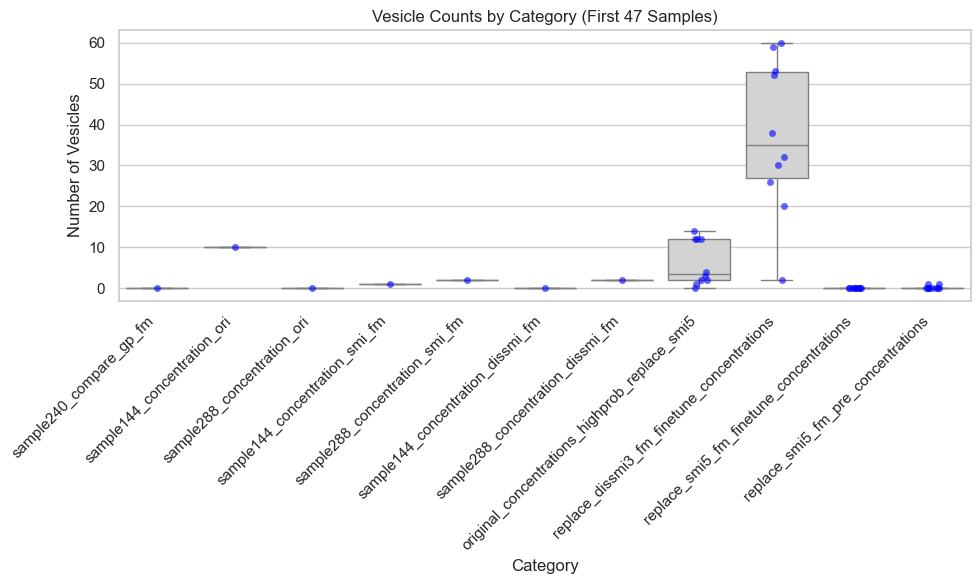

In [26]:
# Subset the first 100 samples
df_first_47 = df_selected.iloc[:47]

# Set the figure size and style
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Create a boxplot + scatter plot
sns.boxplot(data=df_first_47, x='category', y='num_vesicles', color='lightgray', showfliers=False)
sns.stripplot(data=df_first_47, x='category', y='num_vesicles', 
              jitter=True, color='blue', size=5, alpha=0.6)

# Improve readability
plt.xticks(rotation=45, ha='right')
plt.ylabel("Number of Vesicles")
plt.xlabel("Category")
plt.title("Vesicle Counts by Category (First 47 Samples)")
plt.tight_layout()

plt.show()

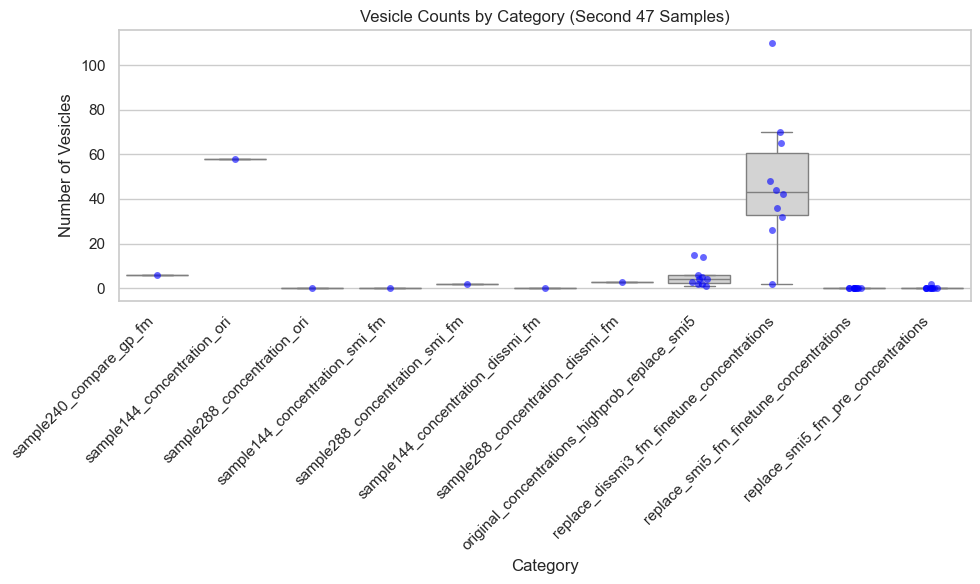

In [27]:
# Subset the first 100 samples
df_second_47 = df_selected.iloc[47:]

# Set the figure size and style
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Create a boxplot + scatter plot
sns.boxplot(data=df_second_47, x='category', y='num_vesicles', color='lightgray', showfliers=False)
sns.stripplot(data=df_second_47, x='category', y='num_vesicles', 
              jitter=True, color='blue', size=5, alpha=0.6)

# Improve readability
plt.xticks(rotation=45, ha='right')
plt.ylabel("Number of Vesicles")
plt.xlabel("Category")
plt.title("Vesicle Counts by Category (Second 47 Samples)")
plt.tight_layout()

plt.show()

In [102]:
df_second_47

,position,num_vesicles,area_vesicles,area_percent,category,sample_id
47,E11,6,3297.886888,0.003145,sample240_compare_gp_fm,0
48,E12,58,42305.079372,0.040345,sample144_concentration_ori,0
49,E13,0,0.000000,0.000000,sample288_concentration_ori,0
50,E14,0,0.000000,0.000000,sample144_concentration_smi_fm,0
51,E15,2,4322.831491,0.004123,sample288_concentration_smi_fm,0
52,E16,0,0.000000,0.000000,sample144_concentration_dissmi_fm,0
53,E17,3,9496.641893,0.009057,sample288_concentration_dissmi_fm,0
54,E18,14,10072.338746,0.009606,original_concentrations_highprob_replace_smi5,0
55,E19,4,4137.477525,0.003946,original_concentrations_highprob_replace_smi5,1
56,E20,2,2447.693376,0.002334,original_concentrations_highprob_replace_smi5,2


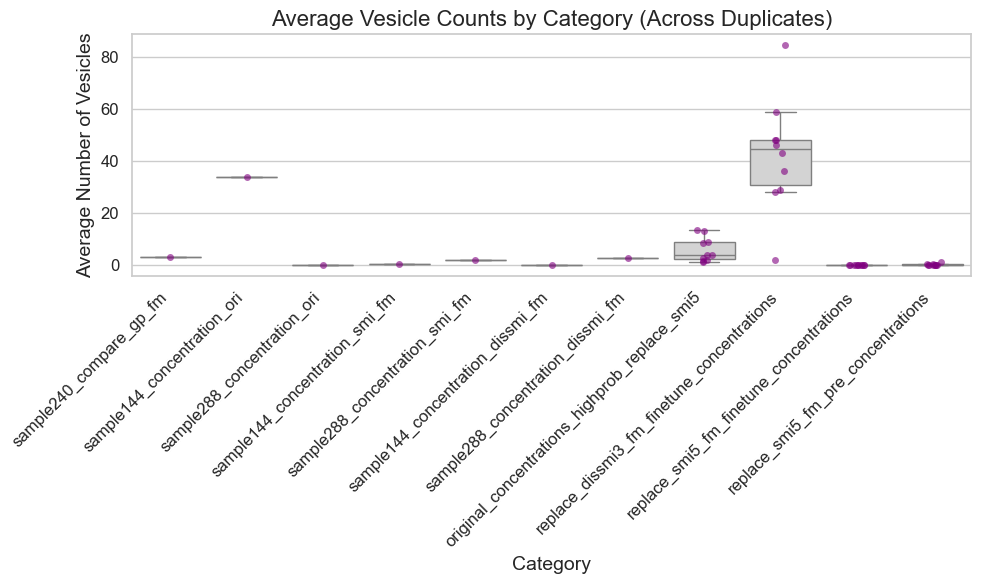

In [29]:
# Average results
df_first_47 = df_selected.iloc[:47].copy()
df_second_47 = df_selected.iloc[47:].copy()

# Add a sample index within each category (0 to 9)
df_first_47['sample_id'] = df_first_47.groupby('category').cumcount()
df_second_47['sample_id'] = df_second_47.groupby('category').cumcount()

# Merge on category + sample_id
df_merged = pd.merge(df_first_47, df_second_47, on=['category', 'sample_id'], suffixes=('_1', '_2'))

# Compute average vesicle count
df_merged['num_vesicles_avg'] = (df_merged['num_vesicles_1'] + df_merged['num_vesicles_2']) / 2

# Prepare for plotting
df_avg = df_merged[['category', 'num_vesicles_avg']]

# Plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.boxplot(data=df_avg, x='category', y='num_vesicles_avg', color='lightgray', showfliers=False)
sns.stripplot(data=df_avg, x='category', y='num_vesicles_avg', 
              jitter=True, color='purple', size=5, alpha=0.6)

# Labeling
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Category", fontsize=14)
plt.ylabel("Average Number of Vesicles", fontsize=14)
plt.title("Average Vesicle Counts by Category (Across Duplicates)", fontsize=16)
plt.tight_layout()

plt.show()

In [32]:
df_avg["num_vesicles_avg"] = df_avg["num_vesicles_avg"].round().astype(int)
df_avg

/var/folders/wn/w203521n4h18b4_rz5rd9tw80000gp/T/ipykernel_13702/1048605343.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_avg["num_vesicles_avg"] = df_avg["num_vesicles_avg"].round().astype(int)


,category,num_vesicles_avg
0,sample240_compare_gp_fm,3
1,sample144_concentration_ori,34
2,sample288_concentration_ori,0
3,sample144_concentration_smi_fm,0
4,sample288_concentration_smi_fm,2
5,sample144_concentration_dissmi_fm,0
6,sample288_concentration_dissmi_fm,2
7,original_concentrations_highprob_replace_smi5,13
8,original_concentrations_highprob_replace_smi5,4
9,original_concentrations_highprob_replace_smi5,2


In [35]:
df_avg.to_csv('df_avg_fm_20250903.csv', index=False)

In [30]:
# Now seperate them and show the verification vs prediction

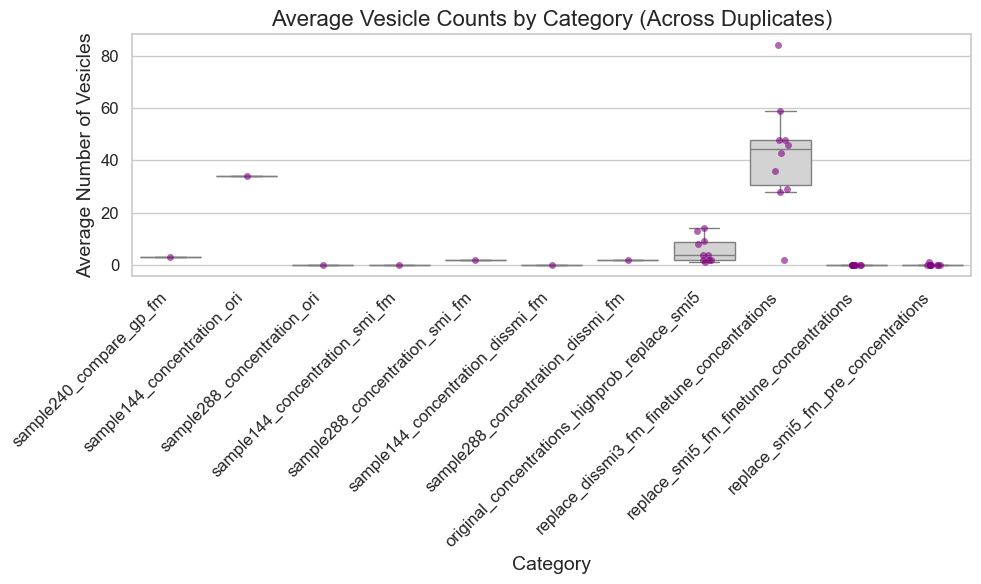

In [34]:
plt.figure(figsize=(10, 6))

sns.boxplot(data=df_avg, x='category', y='num_vesicles_avg', color='lightgray', showfliers=False)
sns.stripplot(data=df_avg, x='category', y='num_vesicles_avg', 
              jitter=True, color='purple', size=5, alpha=0.6)

# Labeling
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Category", fontsize=14)
plt.ylabel("Average Number of Vesicles", fontsize=14)
plt.title("Average Vesicle Counts by Category (Across Duplicates)", fontsize=16)
plt.tight_layout()

plt.show()

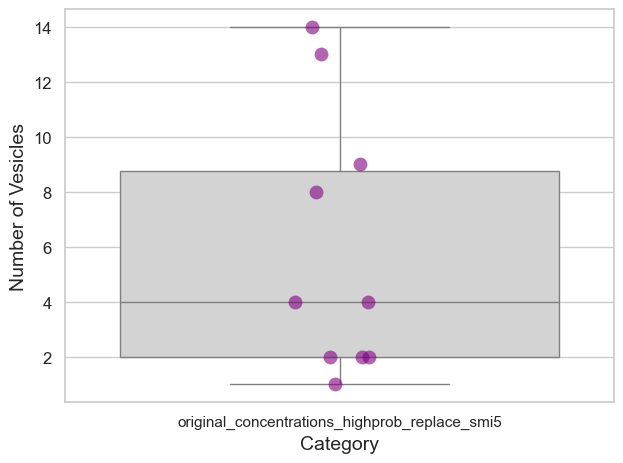

In [83]:
# plot only the explorative dataset
plt.figure()

sns.boxplot(data=df_avg.iloc[7:17,:], x='category', y='num_vesicles_avg', color='lightgray', showfliers=False)
sns.stripplot(data=df_avg.iloc[7:17,:], x='category', y='num_vesicles_avg', 
              jitter=True, color='purple', size=10, alpha=0.6)

# Labeling
# plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Category", fontsize=14)
plt.ylabel("Number of Vesicles", fontsize=14)
# plt.title("Average Vesicle Counts by Category (Across Duplicates)", fontsize=16)
plt.tight_layout()

plt.show()

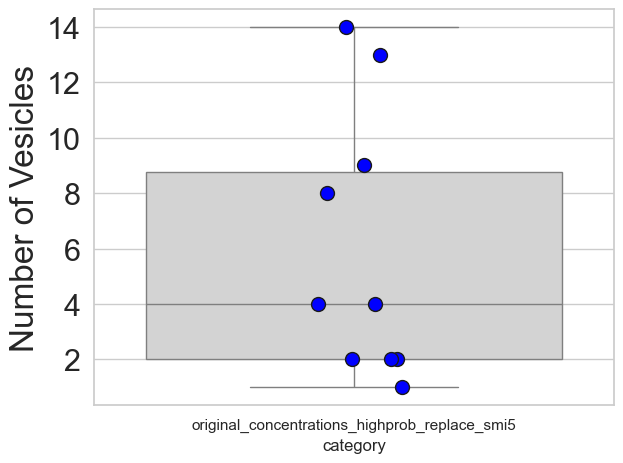

In [131]:
# Reformat plot
plt.figure()

sns.boxplot(data=df_avg.iloc[7:17,:], x='category', y='num_vesicles_avg', color='lightgray', showfliers=False)
sns.stripplot(data=df_avg.iloc[7:17,:], x='category', y='num_vesicles_avg', 
              jitter=True, color='blue', size=10, edgecolor='k', linewidth=1)

# Labeling
# plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=22)
# plt.xlabel("Category", fontsize=14)
plt.ylabel("Number of Vesicles", fontsize=24)
# plt.title("Average Vesicle Counts by Category (Across Duplicates)", fontsize=16)
plt.tight_layout()
plt.savefig(path+f"/experiment_exploration.png", dpi=600, bbox_inches="tight")
plt.show()
plt.close()

In [ ]:
df1_combine = pd.concat([df_first_47.iloc[0:7,:], df_second_47.iloc[0:7,:]])

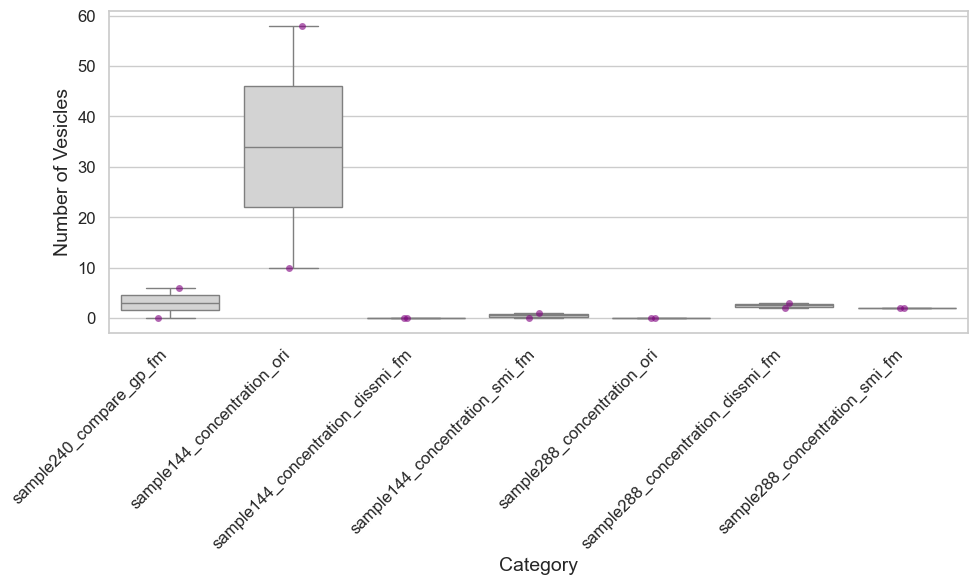

In [50]:
plt.figure(figsize=(10, 6))

order = [
    "sample240_compare_gp_fm",
    "sample144_concentration_ori",
    "sample144_concentration_dissmi_fm",
    "sample144_concentration_smi_fm",
    "sample288_concentration_ori",
    "sample288_concentration_dissmi_fm",
    "sample288_concentration_smi_fm"
]

sns.boxplot(
    data=df1_combine, x='category', y='num_vesicles',
    color='lightgray', showfliers=False, order=order
)
sns.stripplot(
    data=df1_combine, x='category', y='num_vesicles',
    jitter=True, color='purple', size=5, alpha=0.6, order=order
)

# Labeling
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Category", fontsize=14)
plt.ylabel("Number of Vesicles", fontsize=14)
plt.tight_layout()

plt.show()

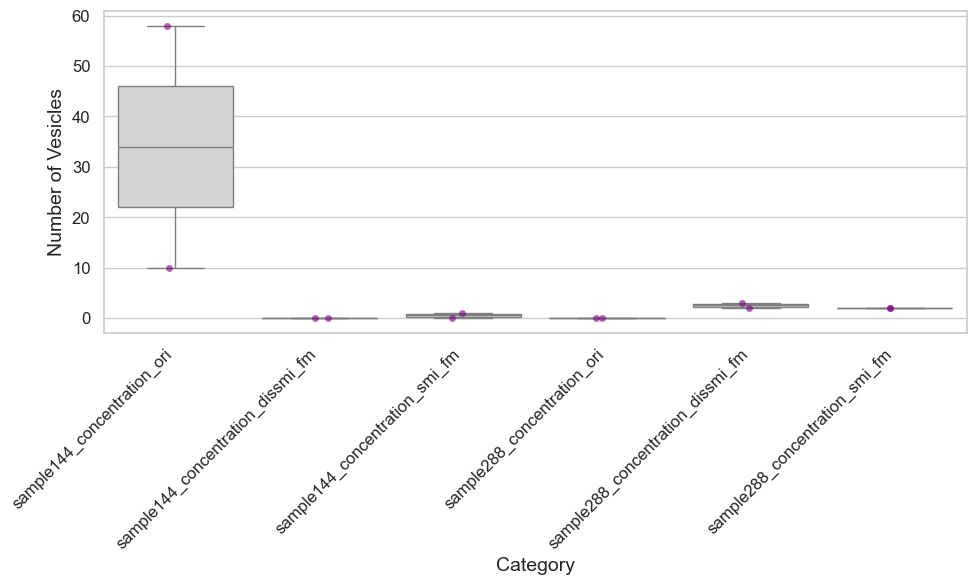

In [84]:
plt.figure(figsize=(10, 6))

order = [
   
    "sample144_concentration_ori",
    "sample144_concentration_dissmi_fm",
    "sample144_concentration_smi_fm",
    "sample288_concentration_ori",
    "sample288_concentration_dissmi_fm",
    "sample288_concentration_smi_fm"
]

sns.boxplot(
    data=df1_combine, x='category', y='num_vesicles',
    color='lightgray', showfliers=False, order=order
)
sns.stripplot(
    data=df1_combine, x='category', y='num_vesicles',
    jitter=True, color='purple', size=5, alpha=0.6, order=order
)

# Labeling
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Category", fontsize=14)
plt.ylabel("Number of Vesicles", fontsize=14)
plt.tight_layout()

plt.show()

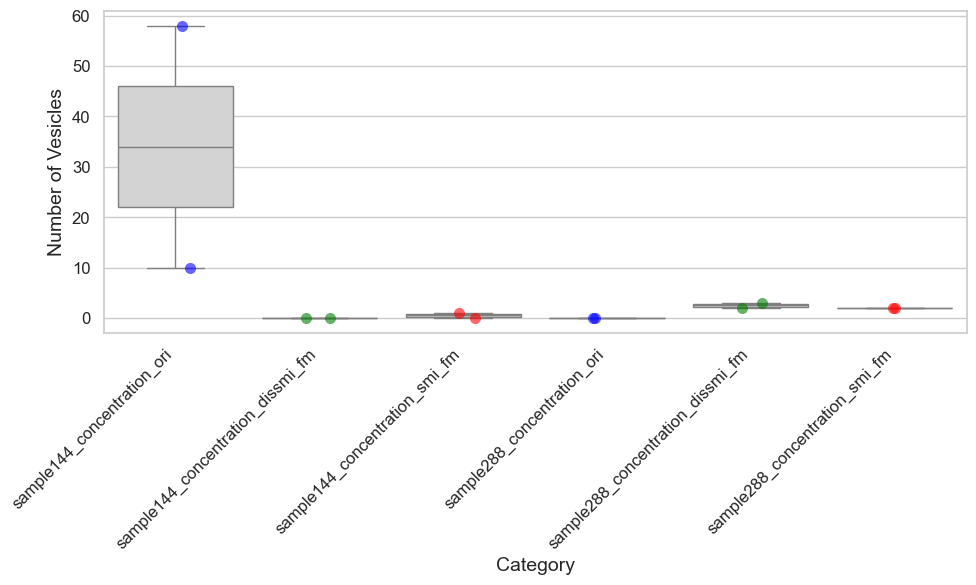

In [97]:
# Different color
plt.figure(figsize=(10, 6))

order = [
   
    "sample144_concentration_ori",
    "sample144_concentration_dissmi_fm",
    "sample144_concentration_smi_fm",
    "sample288_concentration_ori",
    "sample288_concentration_dissmi_fm",
    "sample288_concentration_smi_fm"
]

# Map colors for stripplot
# color_map = {
#     '_ori': 'blue',
#     '_dissmi_fm': 'green',
#     '_smi_fm': 'red'
# }
# strip_colors = []
# for cat in df1_combine['category']:
#     matched = [k for k in color_map if k in cat]
#     if matched:
#         strip_colors.append(color_map[matched[0]])
#     else:
#         strip_colors.append('gray')  # default color if no match


sns.boxplot(
    data=df1_combine, x='category', y='num_vesicles',
    color='lightgray', showfliers=False, order=order
)
# Map colors for stripplot points
point_colors = ['blue', 'green', 'red', 'blue', 'green', 'red']

# Stripplot with per-category colors
for i, cat in enumerate(order):
    sns.stripplot(
        data=df1_combine[df1_combine['category'] == cat],
        x='category', y='num_vesicles',
        jitter=True, size=8, alpha=0.6, color=point_colors[i]
    )
    
# sns.stripplot(
#     data=df1_combine, x='category', y='num_vesicles',
#     jitter=True, color='purple', size=8, alpha=0.6, order=order,
#     palette=strip_colors 
# )

# Labeling
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Category", fontsize=14)
plt.ylabel("Number of Vesicles", fontsize=14)
plt.tight_layout()

plt.show()

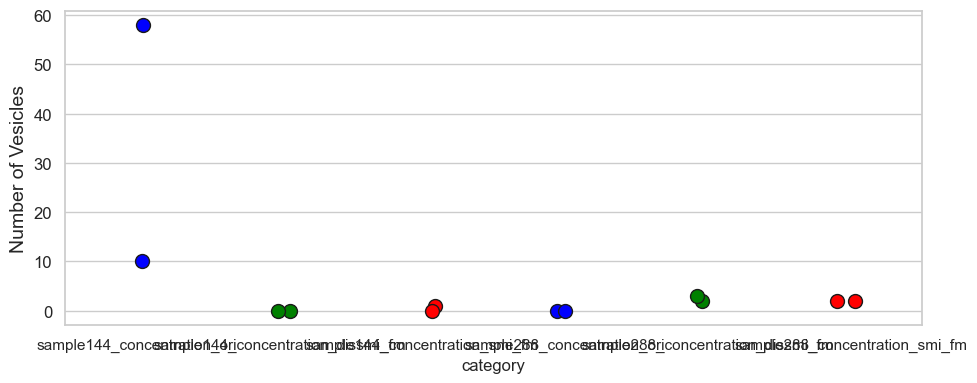

In [132]:
# Reformat plot
# Different color
plt.figure(figsize=(10, 4))

order = [
   
    "sample144_concentration_ori",
    "sample144_concentration_dissmi_fm",
    "sample144_concentration_smi_fm",
    "sample288_concentration_ori",
    "sample288_concentration_dissmi_fm",
    "sample288_concentration_smi_fm"
]



# Map colors for stripplot points
point_colors = ['blue', 'green', 'red', 'blue', 'green', 'red']

# Stripplot with per-category colors
for i, cat in enumerate(order):
    sns.stripplot(
        data=df1_combine[df1_combine['category'] == cat],
        x='category', y='num_vesicles',
        jitter=True, size=10,  color=point_colors[i],
        edgecolor='k', linewidth=1
    )

# Labeling
# plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
# plt.xlabel("Category", fontsize=14)
plt.ylabel("Number of Vesicles", fontsize=14)
plt.tight_layout()
plt.savefig(path+f"/experiment_conc_sweep.png", dpi=600, bbox_inches="tight")

plt.show()
plt.close()

In [95]:
df1_combine['category']

0               sample240_compare_gp_fm
1           sample144_concentration_ori
2           sample288_concentration_ori
3        sample144_concentration_smi_fm
4        sample288_concentration_smi_fm
5     sample144_concentration_dissmi_fm
6     sample288_concentration_dissmi_fm
47              sample240_compare_gp_fm
48          sample144_concentration_ori
49          sample288_concentration_ori
50       sample144_concentration_smi_fm
51       sample288_concentration_smi_fm
52    sample144_concentration_dissmi_fm
53    sample288_concentration_dissmi_fm
Name: category, dtype: object

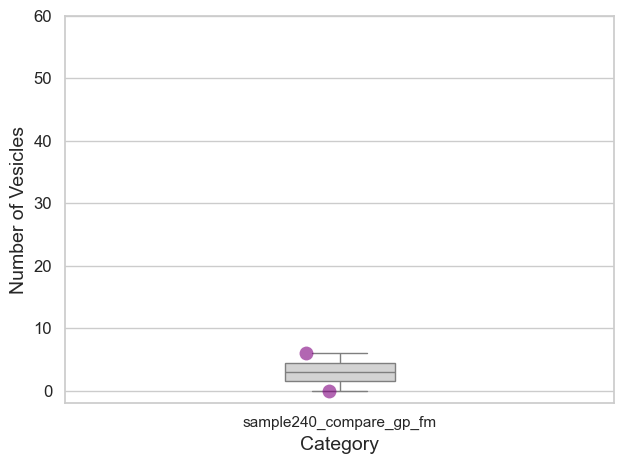

In [92]:
# plot samples that compare gp and fm
plt.figure()

order = [
    "sample240_compare_gp_fm",
    
]

sns.boxplot(
    data=df1_combine, x='category', y='num_vesicles',
    color='lightgray', showfliers=False, order=order, width=0.2
)
sns.stripplot(
    data=df1_combine, x='category', y='num_vesicles',
    jitter=True, color='purple', size=10, alpha=0.6, order=order
)

# Labeling
# plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Category", fontsize=14)
plt.ylabel("Number of Vesicles", fontsize=14)
plt.ylim(-2, 60)
plt.tight_layout()

plt.show()

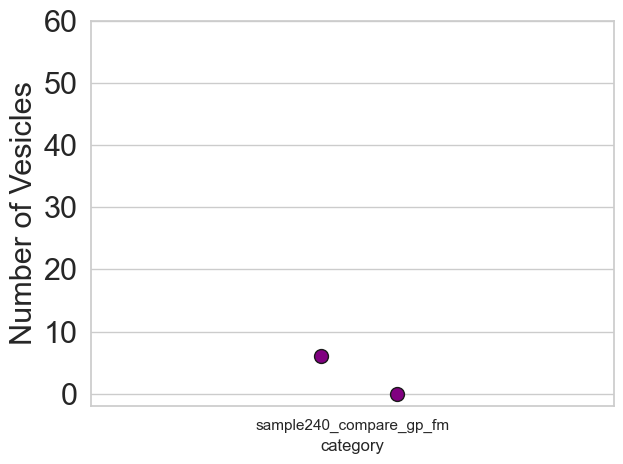

In [113]:
# plot samples that compare gp and fm
# Reformat
path = '/Users/haoliu/Documents/GitHub/FoundationModel_on_Liposome/code/results'

plt.figure()

order = [
    "sample240_compare_gp_fm",
    
]

# sns.boxplot(
#     data=df1_combine, x='category', y='num_vesicles',
#     color='lightgray', showfliers=False, order=order, width=0.2
# )
sns.stripplot(
    data=df1_combine, x='category', y='num_vesicles', edgecolor='k',
    linewidth=1,
    jitter=True, color='purple', size=10,  order=order
)

# Labeling
# plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=22)
# plt.xlabel("Category", fontsize=14)
plt.ylabel("Number of Vesicles", fontsize=22)
plt.ylim(-2, 60)
plt.tight_layout()
plt.savefig(path+f"/experiment_fmvsgp.png", dpi=600, bbox_inches="tight")
plt.show()
plt.close()

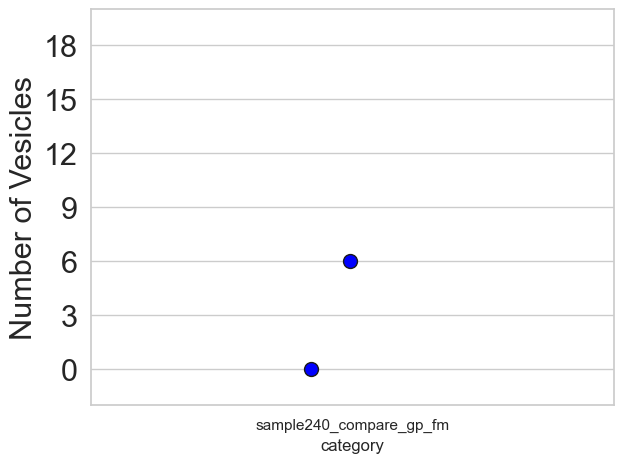

In [137]:
import matplotlib.ticker as ticker

# without y axis limit
path = '/Users/haoliu/Documents/GitHub/FoundationModel_on_Liposome/code/results'

plt.figure()

order = [
    "sample240_compare_gp_fm",
    
]

# sns.boxplot(
#     data=df1_combine, x='category', y='num_vesicles',
#     color='lightgray', showfliers=False, order=order, width=0.2
# )
sns.stripplot(
    data=df1_combine, x='category', y='num_vesicles', edgecolor='k',
    linewidth=1,
    jitter=True, color='blue', size=10,  order=order
)

# Labeling
# plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=22)
# plt.xlabel("Category", fontsize=14)
plt.ylabel("Number of Vesicles", fontsize=22)
plt.ylim(-2, 20)
# Force integer y-axis ticks
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.tight_layout()
plt.savefig(path+f"/experiment_fmvsgp.png", dpi=600, bbox_inches="tight")
plt.show()
plt.close()

In [135]:
df1_combine

,position,num_vesicles,area_vesicles,area_percent,category,sample_id
0,C03,0,330.259928,0.000315,sample240_compare_gp_fm,0
1,C04,10,6121.393286,0.005838,sample144_concentration_ori,0
2,C05,0,330.259928,0.000315,sample288_concentration_ori,0
3,C06,1,1557.051859,0.001485,sample144_concentration_smi_fm,0
4,C07,2,2107.223272,0.002010,sample288_concentration_smi_fm,0
5,C08,0,0.000000,0.000000,sample144_concentration_dissmi_fm,0
6,C09,2,8229.794655,0.007849,sample288_concentration_dissmi_fm,0
47,E11,6,3297.886888,0.003145,sample240_compare_gp_fm,0
48,E12,58,42305.079372,0.040345,sample144_concentration_ori,0
49,E13,0,0.000000,0.000000,sample288_concentration_ori,0


In [38]:
# Now bring another previous dataset in for comparison model fine-tuning

In [51]:
df_avg_pre = pd.read_csv('df_avg_fm_20250806.csv')
df_avg_pre

,category,num_vesicles_avg
0,High_original,1
1,High_original,4
2,High_original,10
3,High_original,7
4,High_original,12
...,...,...
95,Low_replace_smi5,2
96,Low_replace_smi5,0
97,Low_replace_smi5,0
98,Low_replace_smi5,0


In [54]:
# find this subset: High_replace_dismis3
df_pre_subset = df_avg_pre[df_avg_pre["category"] == "High_replace_dismis3"]
df_pre_subset

,category,num_vesicles_avg
40,High_replace_dismis3,22
41,High_replace_dismis3,56
42,High_replace_dismis3,52
43,High_replace_dismis3,58
44,High_replace_dismis3,66
45,High_replace_dismis3,36
46,High_replace_dismis3,50
47,High_replace_dismis3,0
48,High_replace_dismis3,23
49,High_replace_dismis3,148


In [58]:
df_combine2 = pd.concat([df_pre_subset, df_avg.iloc[17:,:]], axis=0)

In [59]:
df_combine2

,category,num_vesicles_avg
40,High_replace_dismis3,22
41,High_replace_dismis3,56
42,High_replace_dismis3,52
43,High_replace_dismis3,58
44,High_replace_dismis3,66
45,High_replace_dismis3,36
46,High_replace_dismis3,50
47,High_replace_dismis3,0
48,High_replace_dismis3,23
49,High_replace_dismis3,148


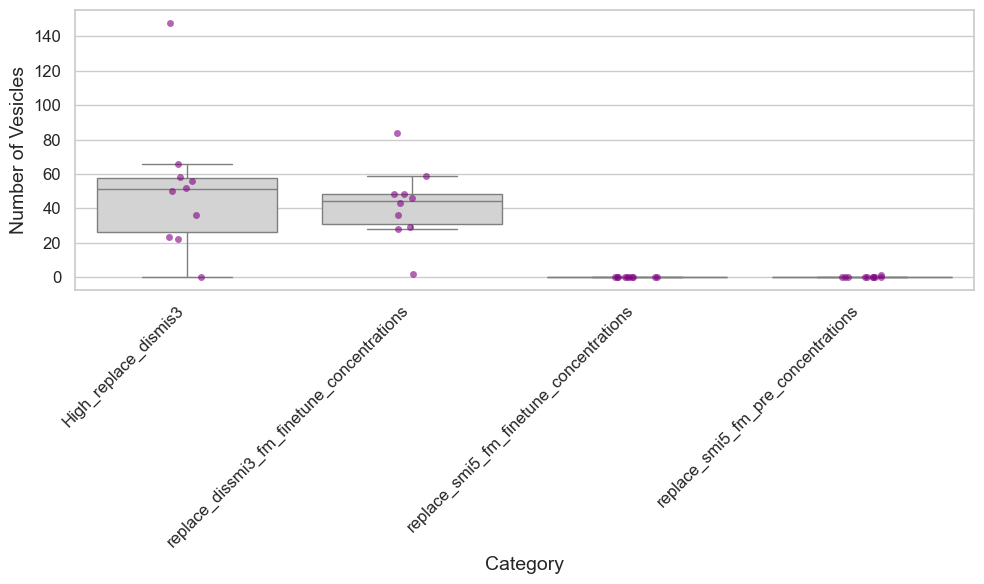

In [63]:
plt.figure(figsize=(10, 6))

sns.boxplot(
    data=df_combine2, x='category', y='num_vesicles_avg',
    color='lightgray', showfliers=False, 
)
sns.stripplot(
    data=df_combine2, x='category', y='num_vesicles_avg',
    jitter=True, color='purple', size=5, alpha=0.6, 
)

# Labeling
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Category", fontsize=14)
plt.ylabel("Number of Vesicles", fontsize=14)
plt.tight_layout()

plt.show()

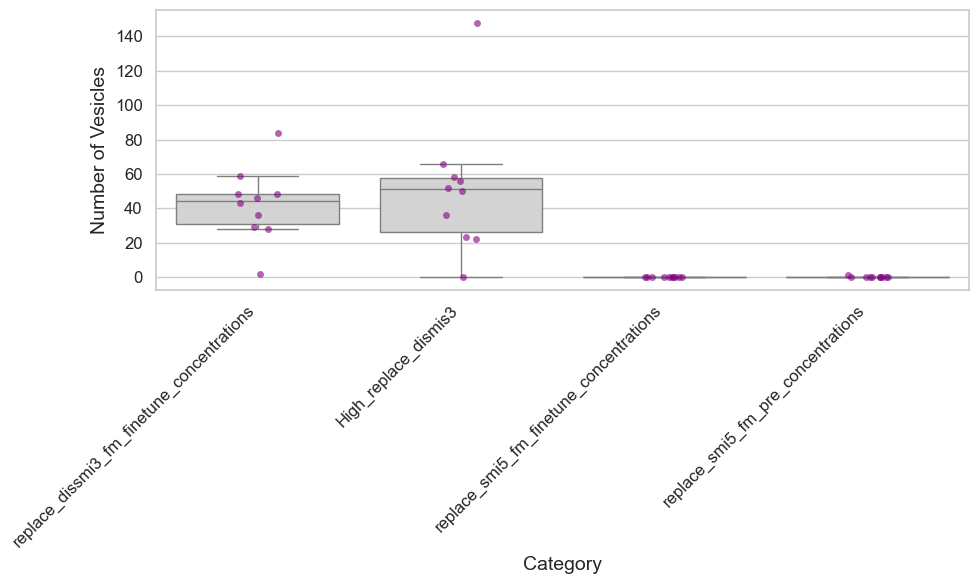

In [71]:
# Flip the order
# categories = df_combine2['category'].unique()

# Flip the first 10 and the second 10
new_order = [
 'replace_dissmi3_fm_finetune_concentrations',
 'High_replace_dismis3',
 'replace_smi5_fm_finetune_concentrations',
 'replace_smi5_fm_pre_concentrations'
]

plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_combine2, x='category', y='num_vesicles_avg',
    color='lightgray', showfliers=False, order=new_order
)
sns.stripplot(
    data=df_combine2, x='category', y='num_vesicles_avg',
    jitter=True, color='purple', size=5, alpha=0.6, order=new_order
)

# plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Category", fontsize=14)
plt.ylabel("Number of Vesicles", fontsize=14)
plt.tight_layout()
plt.show()


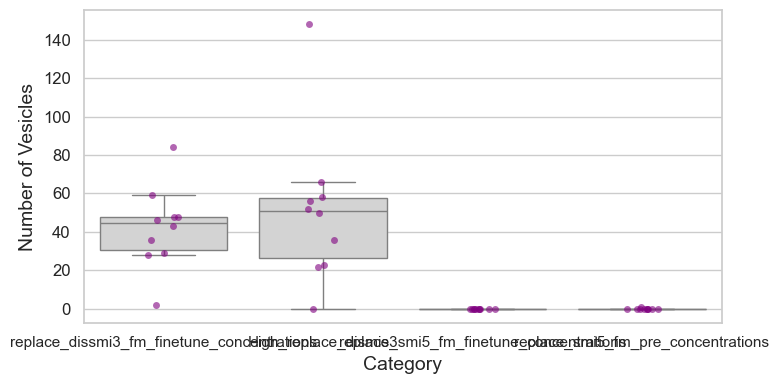

In [101]:
# Flip the order
# categories = df_combine2['category'].unique()

# Flip the first 10 and the second 10
new_order = [
 'replace_dissmi3_fm_finetune_concentrations',
 'High_replace_dismis3',
 'replace_smi5_fm_finetune_concentrations',
 'replace_smi5_fm_pre_concentrations'
]

plt.figure(figsize=(8, 4))
sns.boxplot(
    data=df_combine2, x='category', y='num_vesicles_avg',
    color='lightgray', showfliers=False, order=new_order
)
sns.stripplot(
    data=df_combine2, x='category', y='num_vesicles_avg',
    jitter=True, color='purple', size=5, alpha=0.6, order=new_order
)

# plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Category", fontsize=14)
plt.ylabel("Number of Vesicles", fontsize=14)
plt.tight_layout()
plt.show()


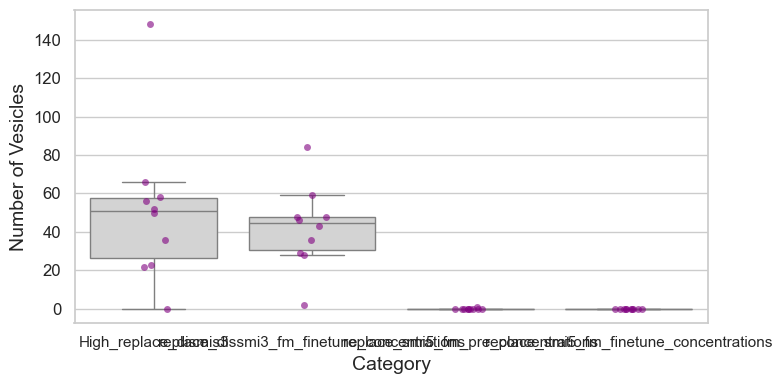

In [103]:
# Put fine tune in front
new_order = [
 'High_replace_dismis3',
 'replace_dissmi3_fm_finetune_concentrations',
 'replace_smi5_fm_pre_concentrations',
 'replace_smi5_fm_finetune_concentrations'

]

plt.figure(figsize=(8, 4))
sns.boxplot(
    data=df_combine2, x='category', y='num_vesicles_avg',
    color='lightgray', showfliers=False, order=new_order
)
sns.stripplot(
    data=df_combine2, x='category', y='num_vesicles_avg',
    jitter=True, color='purple', size=5, alpha=0.6, order=new_order
)

# plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Category", fontsize=14)
plt.ylabel("Number of Vesicles", fontsize=14)
plt.tight_layout()
plt.show()

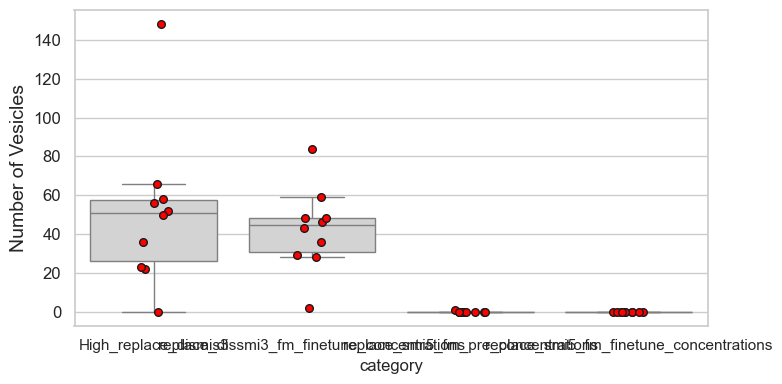

In [126]:
# reformat plot
new_order = [
 'High_replace_dismis3',
 'replace_dissmi3_fm_finetune_concentrations',
 'replace_smi5_fm_pre_concentrations',
 'replace_smi5_fm_finetune_concentrations'

]

plt.figure(figsize=(8, 4))
sns.boxplot(
    data=df_combine2, x='category', y='num_vesicles_avg',
    color='lightgray', showfliers=False, order=new_order
)
sns.stripplot(
    data=df_combine2, x='category', y='num_vesicles_avg',
    jitter=True, color='red', size=5.5, order=new_order,
    edgecolor='k', linewidth=1
)

# plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
# plt.xlabel("Category", fontsize=14)
plt.ylabel("Number of Vesicles", fontsize=14)
plt.tight_layout()
plt.savefig(path+f"/experiment_finetune.png", dpi=600, bbox_inches="tight")

plt.show()
plt.close()